In [1]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sn
import pandas as pd
import random

In [2]:
#data_path = '../data/v1.5.2/graph_avg_1_5'
#data_path = '../data/v1.5.2/graph_cov'
data_path = '../data/v1.5.2/graph_unnormal'
sets = ['dev','train']

In [5]:

def plot_graphs(_set, szr_type, rows, cols, _seed) :
    random.seed(_seed)
    graph_path = os.path.join(data_path,_set,szr_type)
    filenames = [f for f in listdir(graph_path) if isfile(join(graph_path, f))]

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,10))
    for i in range(rows*cols) :
        graph = np.load(os.path.join(graph_path,random.choice(filenames)))
        graph = graph/np.amax(graph.flatten())
        graph = np.triu(graph, 1)
        #if i == 1 : print(np.around(graph[:10,:10],decimals=3))
        ax.flatten()[i].imshow(graph)
        ax.flatten()[i].axis('off')

    fig.suptitle(f"Example of graphs for '{szr_type}' and '{_set}'")
    plt.tight_layout()
    plt.subplots_adjust(wspace = 0, hspace = 0.1)
    plt.show()


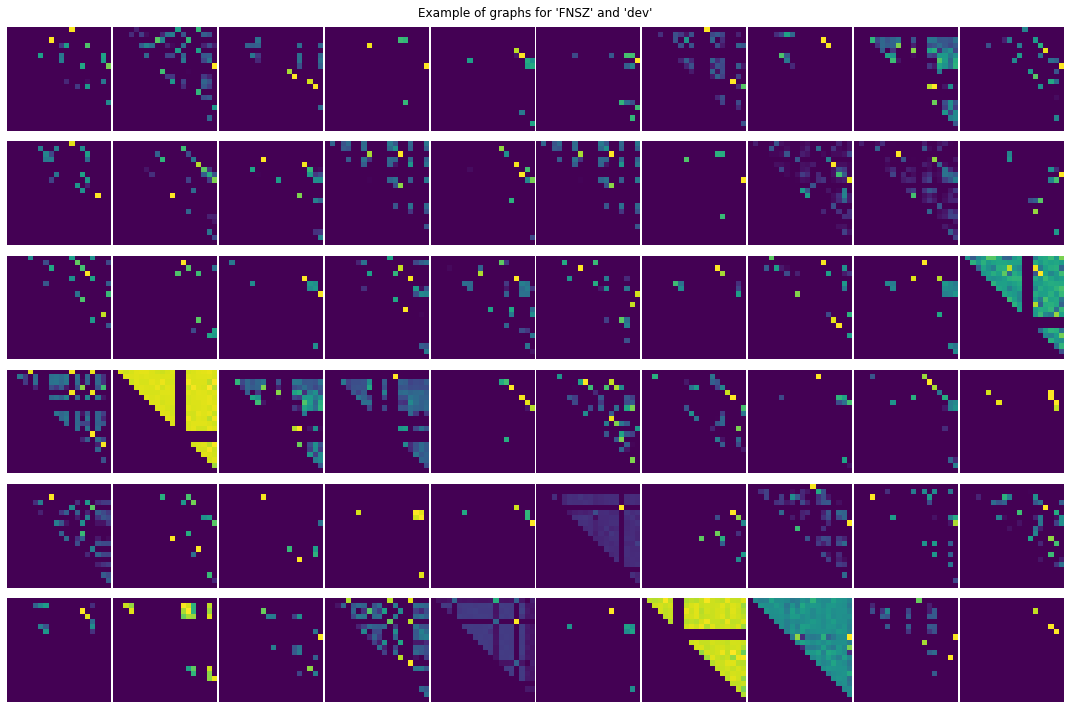

In [6]:
plot_graphs('dev','FNSZ',6,10,0)

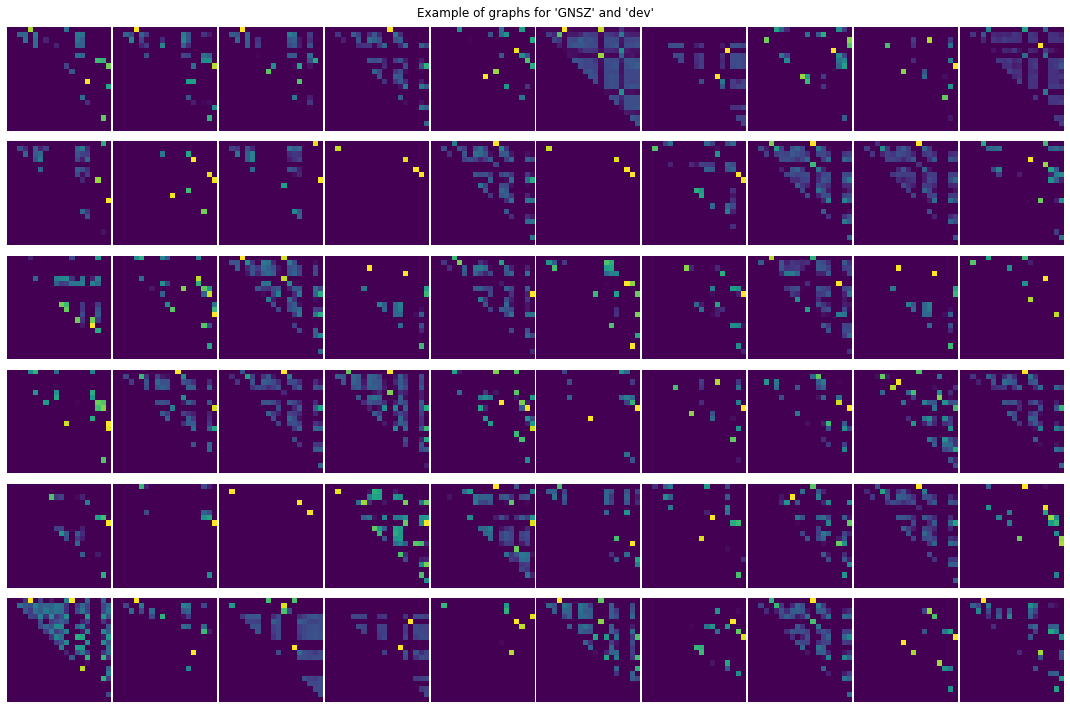

In [7]:
plot_graphs('dev','GNSZ',6,10,0)